In [58]:
%matplotlib inline

import pandas as pd
from os import listdir
from os.path import join
from itertools import combinations

from typing import List

In [84]:
readings = listdir('data/country')

In [75]:
ex = readings[0]
print(ex)
df = pd.read_csv(join('data/country', ex))

202108.csv.gz


In [105]:
# All of the country readings we have should have a corresponding global reading.
assert(
    set(listdir('data/country')).issubset(listdir('data/global'))
)

In [77]:
def originset (reading_df, country_code=None, max_rank=None):
    my_subset = reading_df.copy()
    if country_code:
        my_subset = my_subset[my_subset['country_code']==country_code]
    if max_rank:
        my_subset = my_subset[my_subset['rank'] <= max_rank]
    return set(my_subset['origin'].tolist())

In [78]:
def jaccard_similarity(set1: set, set2: set):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

jaccard_similarity(
    originset(df, 'us'),
    originset(df, 'ca'),
)

0.14592911915557077

In [79]:
global_top = pd.read_csv(join('data/global', ex))

In [80]:
jaccard_similarity(
    originset(df, 'ca'),
    originset(global_top)
)

0.12577531567122702

In [ ]:
# def average_jaccard_similarity (sets: List[set]):
#     similarities = []
#     for a, b in combinations(sets, 2):
#         similarity = jaccard_similarity(a, b)
#         similarities.append(similarity)
#     return sum(similarities) / len(similarities)

# def metric (reading_df):
#     origin_sets = []
#     for country_code in reading_df['country_code'].unique():
#         origin_sets.append(originset(reading_df, country_code))

#     return 1-average_jaccard_similarity(origin_sets)

# metric(df)

In [86]:
readings

['202108.csv.gz',
 '202211.csv.gz',
 '202301.csv.gz',
 '202204.csv.gz',
 '202111.csv.gz',
 '202212.csv.gz',
 '202208.csv.gz',
 '202203.csv.gz',
 '202201.csv.gz',
 '202112.csv.gz',
 '202106.csv.gz',
 '202104.csv.gz',
 '202109.csv.gz',
 '202107.csv.gz',
 '202210.csv.gz',
 '202202.csv.gz',
 '202302.csv.gz',
 '202209.csv.gz',
 '202110.csv.gz',
 '202105.csv.gz',
 '202207.csv.gz',
 '202205.csv.gz',
 '202206.csv.gz']

In [104]:
rows = []
for reading in readings:
    datestr = reading.split('.')[0]
    print(datestr)
    country_top = pd.read_csv(join('data/country', reading))
    global_top = pd.read_csv(join('data/global', reading))
    country_codes = country_top['country_code'].unique()
    metrics = []
    for country_code in country_codes:
        print(country_code, end=",")
        jsim = jaccard_similarity(
            originset(country_top, country_code, max_rank=1000),
            originset(global_top, max_rank=1000)
        )
        metric = 1-jsim
        rows.append(
            [datestr, country_code, metric]
        )

202108
ad,ae,af,ag,ai,al,am,ao,ar,as,at,au,aw,ax,az,ba,bb,bd,be,bf,bg,bh,bi,bj,bl,bm,bn,bo,bq,br,bs,bt,bw,by,bz,ca,cd,cf,cg,ch,ci,ck,cl,cm,cn,co,cr,cu,cv,cw,cy,cz,de,dj,dk,dm,do,dz,ec,ee,eg,eh,er,es,et,fi,fj,fk,fm,fo,fr,ga,gb,gd,ge,gf,gg,gh,gi,gl,gm,gn,gp,gq,gr,gt,gu,gw,gy,hk,hn,hr,ht,hu,id,ie,il,im,in,io,iq,ir,is,it,je,jm,jo,jp,ke,kg,kh,ki,km,kn,kr,kw,ky,kz,la,lb,lc,li,lk,lr,ls,lt,lu,lv,ly,ma,mc,md,me,mf,mg,mh,mk,ml,mm,mn,mo,mp,mq,mr,ms,mt,mu,mv,mw,mx,my,mz,na,nc,ne,nf,ng,ni,nl,no,np,nr,nz,om,pa,pe,pf,pg,ph,pk,pl,pm,pr,ps,pt,pw,py,qa,re,ro,rs,ru,rw,sa,sb,sc,sd,se,sg,sh,si,sj,sk,sl,sm,sn,so,sr,ss,st,sv,sx,sy,sz,tc,td,tg,th,tj,tl,tm,tn,to,tr,tt,tv,tw,tz,ua,ug,us,uy,uz,vc,ve,vg,vi,vn,vu,ws,xk,ye,yt,za,zm,zw,202211
ad,ae,af,ag,ai,al,am,ao,ar,as,at,au,aw,ax,az,ba,bb,bd,be,bf,bg,bh,bi,bj,bl,bm,bn,bo,bq,br,bs,bt,bw,by,bz,ca,cd,cf,cg,ch,ci,ck,cl,cm,cn,co,cr,cu,cv,cw,cx,cy,cz,de,dj,dk,dm,do,dz,ec,ee,eg,eh,er,es,et,fi,fj,fk,fm,fo,fr,ga,gb,gd,ge,gf,gg,gh,gi,gl,gm,gn,gp,gq,gr,gt,gu,gw,gy,hk,hn,hr

ad,ae,af,ag,ai,al,am,ao,ar,as,at,au,aw,ax,az,ba,bb,bd,be,bf,bg,bh,bi,bj,bl,bm,bn,bo,bq,br,bs,bt,bw,by,bz,ca,cd,cf,cg,ch,ci,ck,cl,cm,cn,co,cr,cu,cv,cw,cy,cz,de,dj,dk,dm,do,dz,ec,ee,eg,eh,er,es,et,fi,fj,fk,fm,fo,fr,ga,gb,gd,ge,gf,gg,gh,gi,gl,gm,gn,gp,gq,gr,gt,gu,gw,gy,hk,hn,hr,ht,hu,id,ie,il,im,in,io,iq,ir,is,it,je,jm,jo,jp,ke,kg,kh,ki,km,kn,kr,kw,ky,kz,la,lb,lc,li,lk,lr,ls,lt,lu,lv,ly,ma,mc,md,me,mf,mg,mh,mk,ml,mm,mn,mo,mp,mq,mr,ms,mt,mu,mv,mw,mx,my,mz,na,nc,ne,nf,ng,ni,nl,no,np,nr,nz,om,pa,pe,pf,pg,ph,pk,pl,pm,pr,ps,pt,pw,py,qa,re,ro,rs,ru,rw,sa,sb,sc,sd,se,sg,sh,si,sj,sk,sl,sm,sn,so,sr,ss,st,sv,sx,sy,sz,tc,td,tg,th,tj,tl,tm,tn,to,tr,tt,tv,tw,tz,ua,ug,us,uy,uz,vc,ve,vg,vi,vn,vu,ws,xk,ye,yt,za,zm,zw,202109
ad,ae,af,ag,ai,al,am,ao,ar,as,at,au,aw,ax,az,ba,bb,bd,be,bf,bg,bh,bi,bj,bl,bm,bn,bo,bq,br,bs,bt,bw,by,bz,ca,cd,cf,cg,ch,ci,ck,cl,cm,cn,co,cr,cu,cv,cw,cy,cz,de,dj,dk,dm,do,dz,ec,ee,eg,eh,er,es,et,fi,fj,fk,fm,fo,fr,ga,gb,gd,ge,gf,gg,gh,gi,gl,gm,gn,gp,gq,gr,gt,gu,gw,gy,hk,hn,hr,ht,hu,id,

ad,ae,af,ag,ai,al,am,ao,ar,as,at,au,aw,ax,az,ba,bb,bd,be,bf,bg,bh,bi,bj,bl,bm,bn,bo,bq,br,bs,bt,bw,by,bz,ca,cd,cf,cg,ch,ci,ck,cl,cm,cn,co,cr,cu,cv,cw,cx,cy,cz,de,dj,dk,dm,do,dz,ec,ee,eg,eh,er,es,et,fi,fj,fk,fm,fo,fr,ga,gb,gd,ge,gf,gg,gh,gi,gl,gm,gn,gp,gq,gr,gt,gu,gw,gy,hk,hn,hr,ht,hu,id,ie,il,im,in,io,iq,ir,is,it,je,jm,jo,jp,ke,kg,kh,ki,km,kn,kr,kw,ky,kz,la,lb,lc,li,lk,lr,ls,lt,lu,lv,ly,ma,mc,md,me,mf,mg,mh,mk,ml,mm,mn,mo,mp,mq,mr,ms,mt,mu,mv,mw,mx,my,mz,na,nc,ne,nf,ng,ni,nl,no,np,nr,nz,om,pa,pe,pf,pg,ph,pk,pl,pm,pr,ps,pt,pw,py,qa,re,ro,rs,ru,rw,sa,sb,sc,sd,se,sg,sh,si,sj,sk,sl,sm,sn,so,sr,ss,st,sv,sx,sy,sz,tc,td,tg,th,tj,tl,tm,tn,to,tr,tt,tv,tw,tz,ua,ug,us,uy,uz,vc,ve,vg,vi,vn,vu,ws,xk,ye,yt,za,zm,zw,

In [106]:
content_locality = pd.DataFrame(rows)
content_locality = content_locality.rename(columns={
    0: "date", 
    1: "country_code",
    2: "jaccard_similarity",
})
content_locality['date'] = pd.to_datetime(content_locality['date'], format='%Y%m')#, errors='coerce').dropna()
content_locality = content_locality.set_index('date')

In [108]:
content_locality.to_csv('locality.csv')

<AxesSubplot:xlabel='date', ylabel='Fragmentation'>

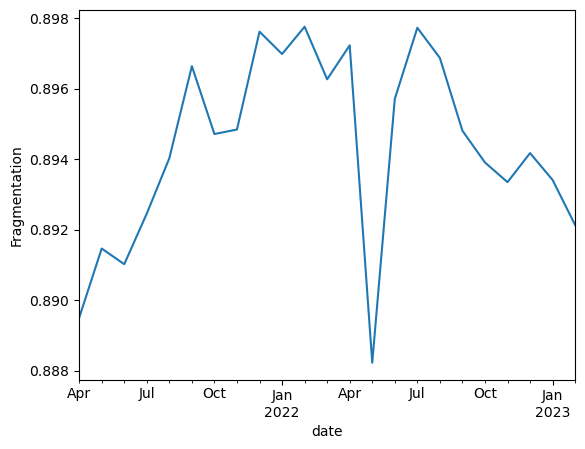

In [110]:
top_level = content_locality.groupby('date').mean()
top_level.plot(ylabel="Fragmentation", legend=False)